<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/Forecasting_with_ETS_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366828 sha256=8c04d974a1b9328a148117c0a1be889ce2bec36636af87fd4ec547bd00e83ca8
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32177 sha256=7325e38e0b1ac49a3b7463ae4eac41f6e893b26b95ee6c2eb08c0f2be0174fe6
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
!gdown https://drive.google.com/uc?id=1H9eWWEeT7bcfveH_SXc_ibnb5m-BXC3s
!unzip /content/datats.zip

Downloading...
From: https://drive.google.com/uc?id=1H9eWWEeT7bcfveH_SXc_ibnb5m-BXC3s
To: /content/datats.zip
100% 16.8k/16.8k [00:00<00:00, 50.1MB/s]
Archive:  /content/datats.zip
  inflating: datats/airline.csv      
  inflating: datats/cheese_fred.csv  
  inflating: datats/christmas.csv    
  inflating: datats/daily_min_temp.csv  
  inflating: datats/perrin_freres_champagne.csv  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

#Cheese Production Data

<Axes: xlabel='date'>

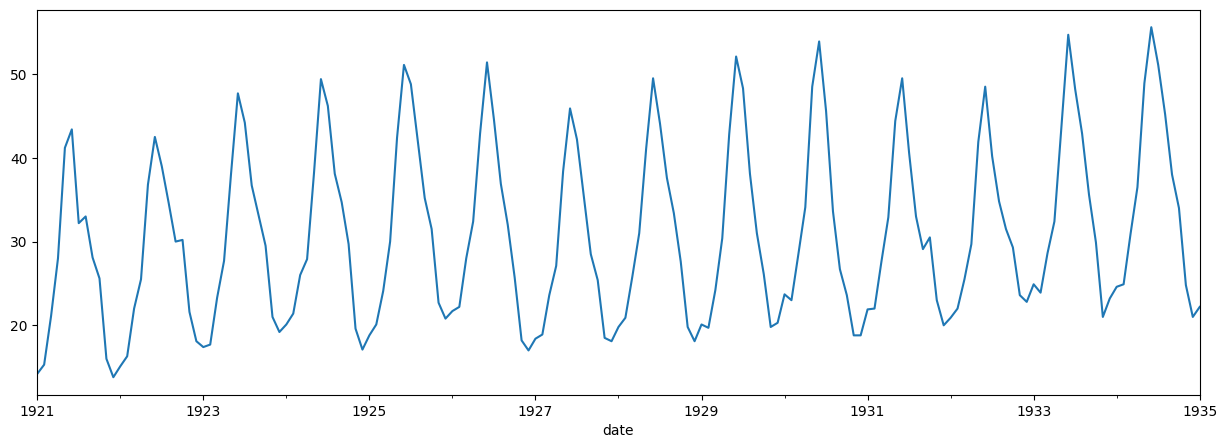

In [4]:
df = pd.read_csv('datats/cheese_fred.csv', index_col = 'date', parse_dates=['date'])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

###Training

In [5]:
es = ExponentialSmoothing(X_train, seasonal='add', seasonal_periods=12, use_boxcox=True)
model = es.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


###Forecast

In [6]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

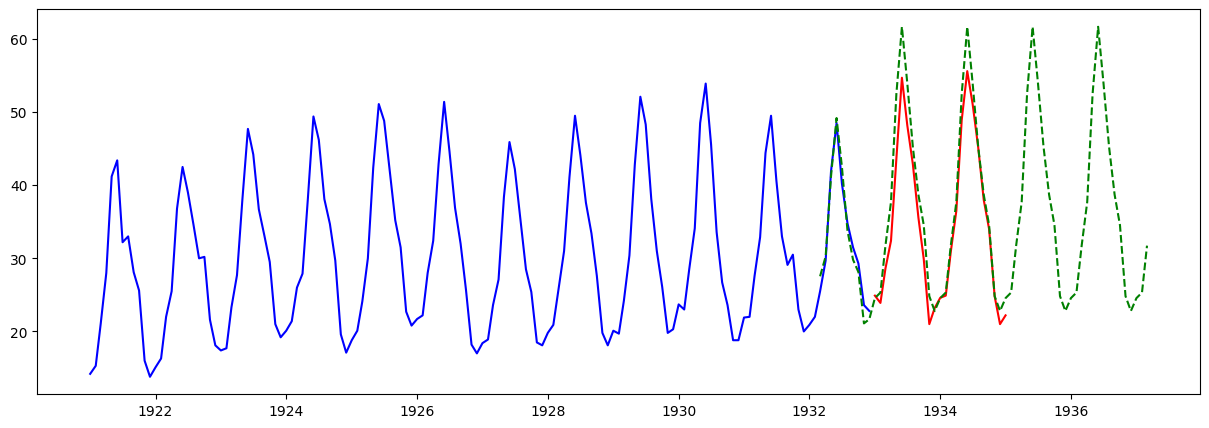

In [7]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')

#Airline Passenegers Data

<Axes: xlabel='Date'>

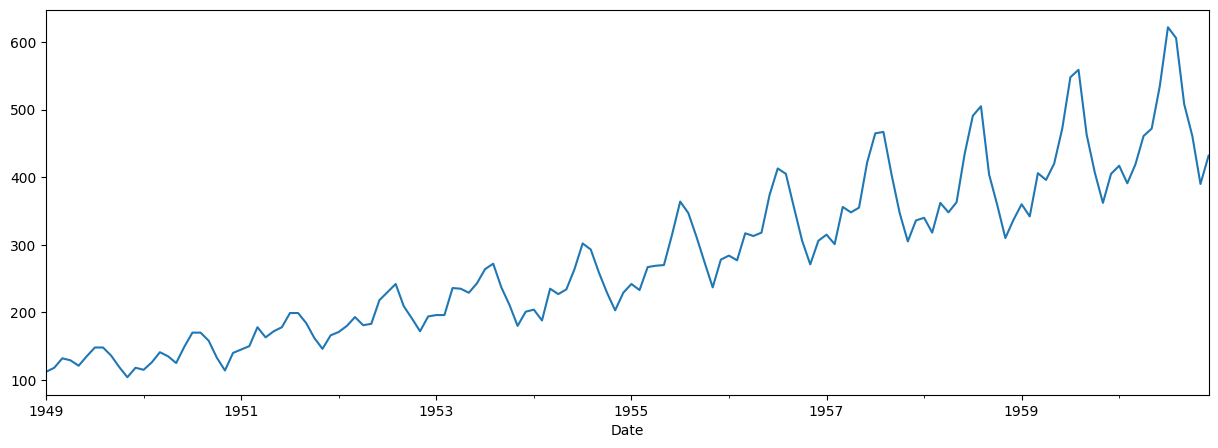

In [8]:
df = pd.read_csv('datats/airline.csv', index_col = 'Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

###Training

In [9]:
es = ExponentialSmoothing(X_train, trend='add', seasonal='mul', seasonal_periods=12, use_boxcox=True)
model = es.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


###Forecast

In [10]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

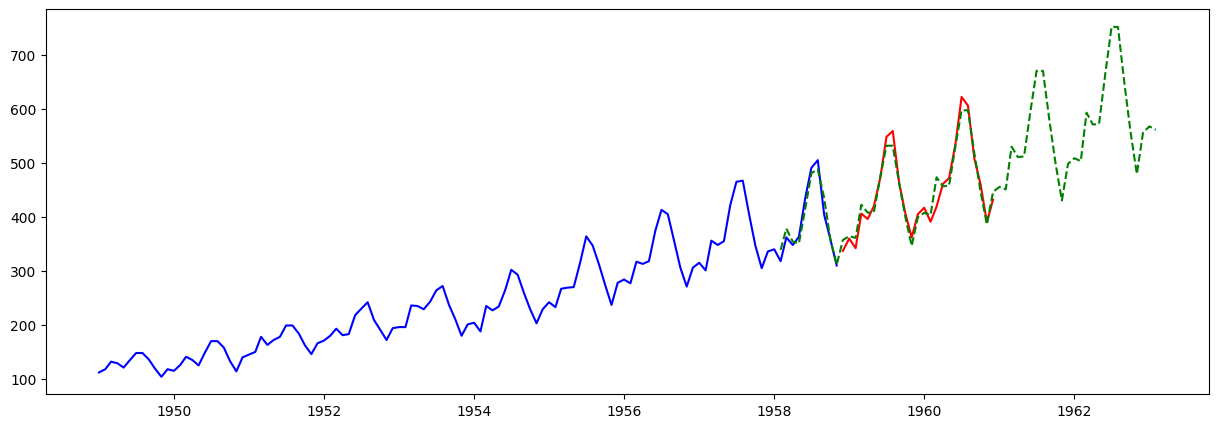

In [11]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')

#Christmas Search Interest

<Axes: xlabel='date'>

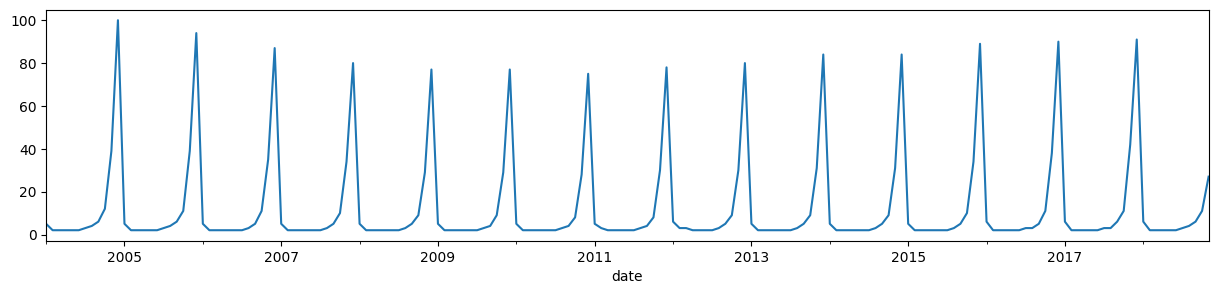

In [12]:
df = pd.read_csv('datats/christmas.csv', index_col = 'date', parse_dates=['date'])
series = df.interest
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [13]:
es = ExponentialSmoothing(X_train, seasonal='add', seasonal_periods=12, use_boxcox=True)
model = es.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


###Forecast

In [14]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

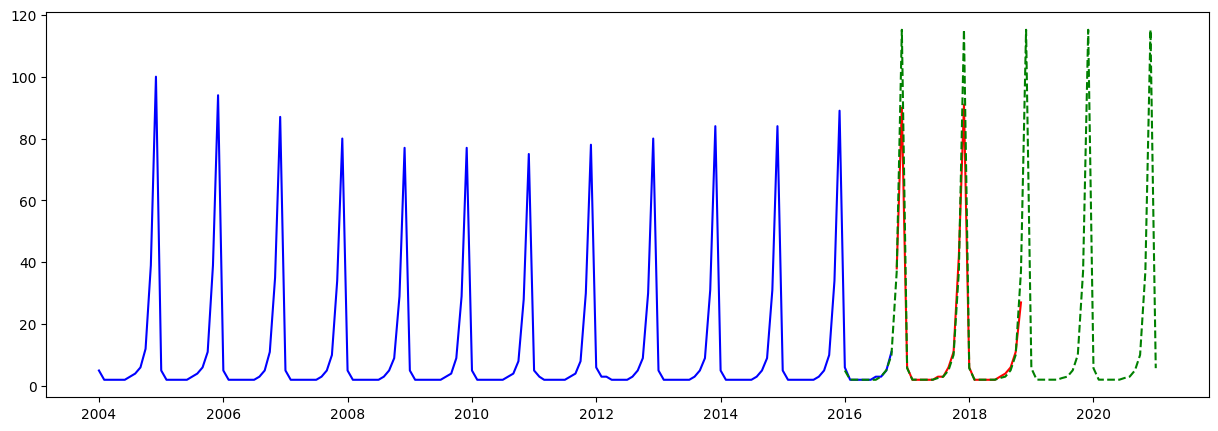

In [15]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')

#Champagne Sales

<Axes: xlabel='date'>

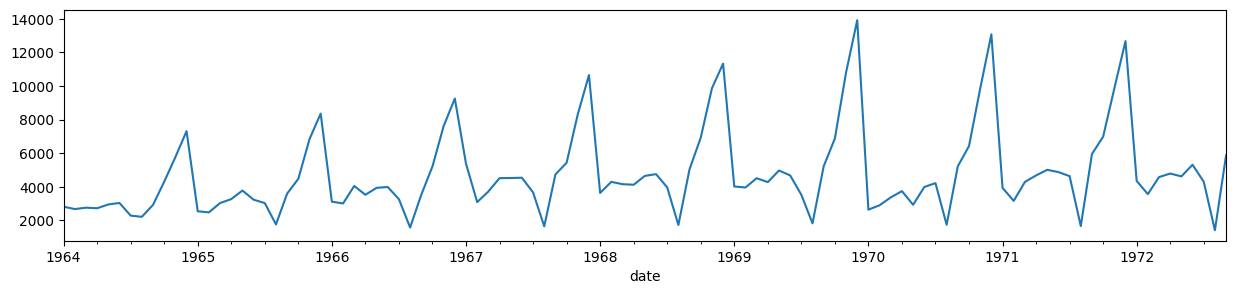

In [16]:
df = pd.read_csv('datats/perrin_freres_champagne.csv', index_col = 'date', parse_dates=['date'])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [17]:
es = ExponentialSmoothing(X_train, seasonal='mul', seasonal_periods=12, use_boxcox=True)
model = es.fit(optimized=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


###Forecast

In [18]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

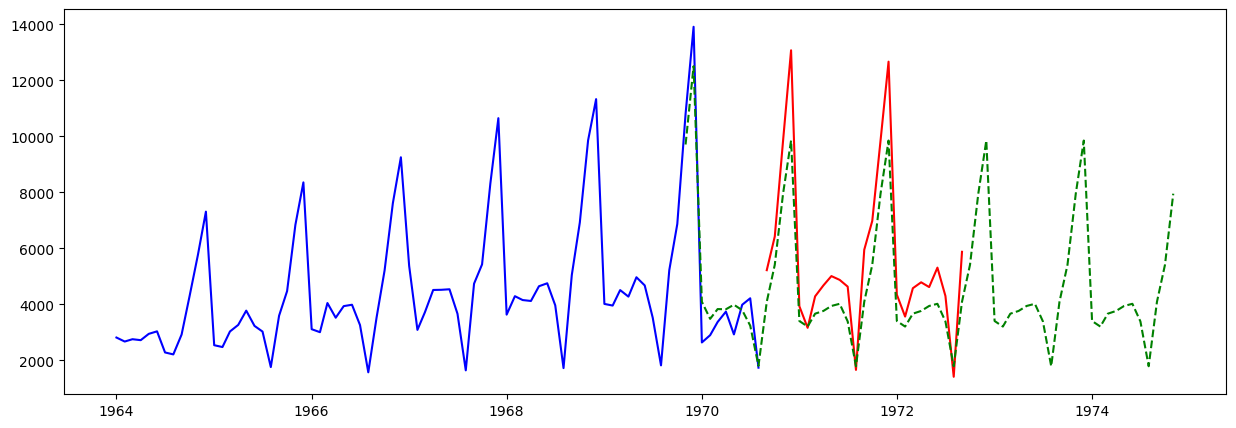

In [19]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')

#Auto ETS

In [20]:
from jcopml.time_series import auto_ets

<Axes: xlabel='Date'>

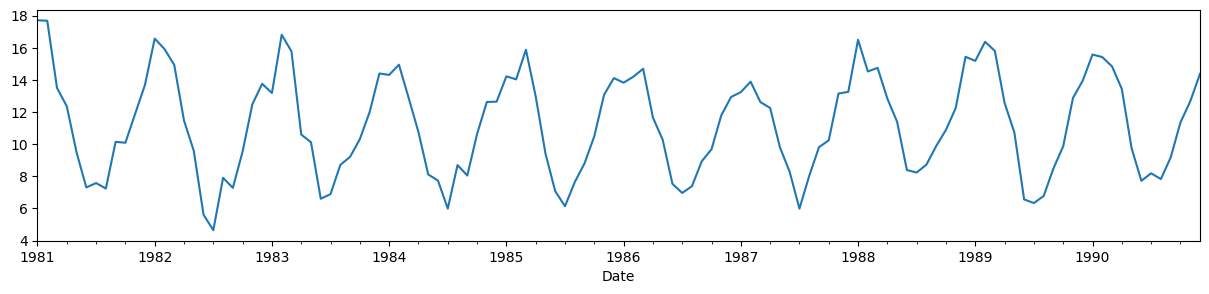

In [21]:
df = pd.read_csv('datats/daily_min_temp.csv', index_col = 'Date', parse_dates=['Date'])
df = df.resample('M').mean()
series = df.Temp
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [22]:
model, cv_results = auto_ets(X_train, scoring='mse')

  0%|          | 0/30 [00:00<?, ?it/s]

In [23]:
cv_results.head()

,trend,seasonal,damped,boxcox,mse_0,mse_1,mse_2,mse_3,mean_mse
3,None,add,False,False,2.359321,1.136672,1.105963,1.960126,1.640520
19,mul,mul,False,False,2.358740,1.310757,0.812214,2.297219,1.694732
2,None,add,False,True,3.054618,1.193997,1.082041,1.861867,1.798131
14,mul,add,False,True,3.485147,1.337511,0.856895,1.976612,1.914041
15,mul,add,False,False,3.422154,1.462575,0.935487,2.153753,1.993492


###Forecast

In [24]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

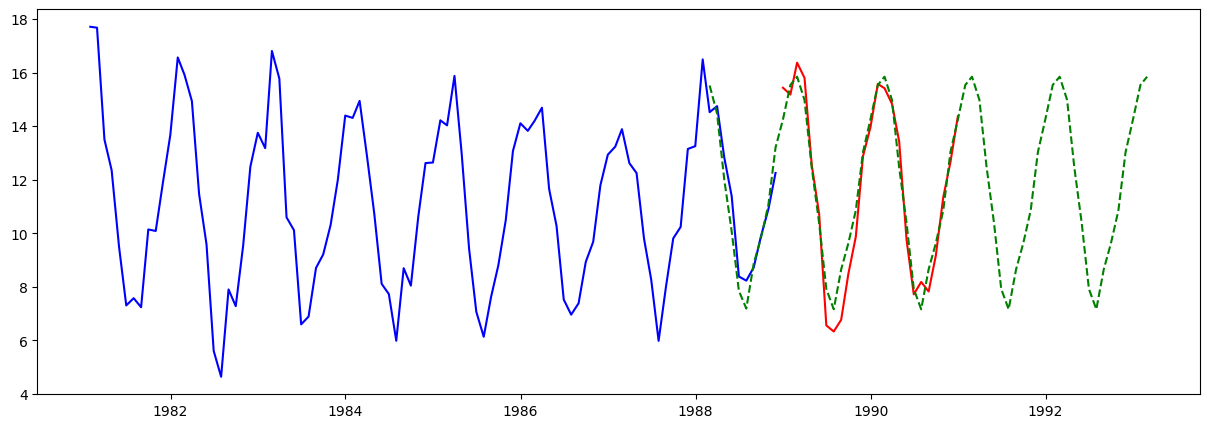

In [25]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')